In [190]:
import acquire
import pandas as pd
import numpy as np
import prepare
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
import scipy.stats as stats

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

Python, Java, C++

In [2]:
# DATA ACQUISITION: lists of repos for 3 different languages were generated

# acquire.get_repo_list(query='machine learning language:python', sort_method='stars', how_many = 50)

# acquire.get_repo_list(query='machine learning language:c++', how_many = 50)

# acquire.get_repo_list(query='machine learning language:java', how_many = 50)

In [3]:
# Data was scraped using the acquire script from Zach
# scraped_data = acquire.scrape_github_data()

In [4]:
# Scrapped data saved to dataframe and json
# data = pd.DataFrame(scraped_data)

# data.to_json('data.json')

In [5]:
# Read data from json into Pandas Dataframe
data = pd.read_json('data.json')

In [6]:
prepared_data = prepare.prepare_df(data, 'readme_contents')

In [23]:
# Calculates total length of readme based on number of characters
prepared_data['original_length'] = prepared_data.readme_contents.str.len()
prepared_data['stem_length'] = prepared_data.stemmed.str.len()
prepared_data['lem_length'] = prepared_data.lemmatized.str.len()

# Calculates total number of words (splitting up by whitespace)
prepared_data['original_word_count'] = prepared_data.readme_contents.str.split().str.len()
prepared_data['stemmed_word_count'] = prepared_data.stemmed.str.split().str.len()
prepared_data['lemmatized_word_count'] = prepared_data.lemmatized.str.split().str.len()

In [25]:
train, validate, test = prepare.train_validate_test_split(prepared_data, target = 'language')

In [26]:
train

,repo,language,readme_contents,clean,stemmed,lemmatized,lem_length,stem_length,original_length,original_word_count,stemmed_word_count,lemmatized_word_count
29,Waikato/meka,Java,# Meka\n\nThe MEKA project provides an open so...,meka meka project provides open source impleme...,meka meka project provid open sourc implement ...,meka meka project provides open source impleme...,844,744,1196,160,91,91
86,StanfordSNR/puffer,C++,# Puffer\n\nPuffer ([puffer.stanford.edu](http...,puffer puffer pufferstanfordeduhttpspufferstan...,puffer puffer pufferstanfordeduhttpspufferstan...,puffer puffer pufferstanfordeduhttpspufferstan...,386,360,512,50,31,31
133,rasbt/mlxtend,Python,[![DOI](https://joss.theoj.org/papers/10.21105...,doihttpsjosstheojorgpapers1021105joss00638stat...,doihttpsjosstheojorgpapers1021105joss00638stat...,doihttpsjosstheojorgpapers1021105joss00638stat...,4125,3858,5620,530,377,377
45,wen-fei/choice,Java,# 基于简单机器算法的考研择校智能推荐系统\n\n## 使用的技术：\n\n### We...,web ssmmavenmysqltomcat pythonjavajpythoncmdpy...,web ssmmavenmysqltomcat pythonjavajpythoncmdpy...,web ssmmavenmysqltomcat pythonjavajpythoncmdpy...,66,66,414,26,5,5
68,4paradigm/OpenMLDB,C++,"\n<div align=center><img src=""./images/openmld...",div aligncenterimg srcimagesopenmldblogopng wi...,div aligncenterimg srcimagesopenmldblogopng wi...,div aligncenterimg srcimagesopenmldblogopng wi...,9808,8754,13382,1453,923,923
...,...,...,...,...,...,...,...,...,...,...,...,...
61,amazon-archives/amazon-dsstne,C++,\n\n# Amazon DSSTNE: Deep Scalable Sparse Tens...,amazon dsstne deep scalable sparse tensor netw...,amazon dsstne deep scalabl spars tensor networ...,amazon dsstne deep scalable sparse tensor netw...,1626,1448,2149,269,170,170
35,ogrisel/pignlproc,Java,# pignlproc\n\nApache Pig utilities to build t...,pignlproc apache pig utilities build training ...,pignlproc apach pig util build train corpora m...,pignlproc apache pig utility build training co...,3888,3566,5483,711,431,431
5,ICT-BDA/EasyML,Java,# Easy Machine Learning\n\n## What is Easy Mac...,easy machine learning easy machine learning ma...,easi machin learn easi machin learn machin lea...,easy machine learning easy machine learning ma...,6175,5533,8681,1213,749,750
94,memo/ofxMSATensorFlow,C++,This addon is no longer maintained. For up-to-...,addon longer maintained uptodate openframework...,addon longer maintain uptod openframework x te...,addon longer maintained uptodate openframework...,8711,7971,12101,1396,860,860


### Is there a significant difference in the length of a README based on the language?

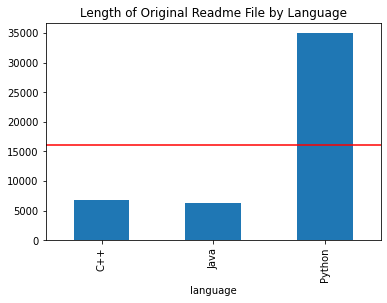

In [39]:
train.groupby('language').original_length.mean().plot.bar()
overall_mean_length_readme = train.original_length.mean()
plt.title('Length of Original Readme File by Language')
plt.axhline(overall_mean_length_readme, color = 'r')

In [49]:
# Perform 1 sample t-test comparing mean length of original README file per language to the overall average length (all languages)
# Set significance level to 0.05
alpha = 0.05
overall_mean_length_readme = train.original_length.mean()
for l in train.language.unique():
    sample = train[train.language == l]
    t,p = stats.ttest_1samp(sample.original_length, overall_mean_length_readme)
    print(l, round(t,5), p<alpha)

Java -10.17324 True
C++ -8.42402 True
Python 1.12877 False


Only Java and C++ show a statistically significant difference in original readme length from the overall mean. Clearly the length of the Python repo READMEs is much higher than the overall average. README length could be a valuable feature to add to the model.

### Are there differences in the number of words in a README based on language?

In [74]:
def generate_category_words(df, categorical = 'language'):
    """ Joins all words in each readme per language. Outputs dataframe with all_words by language.
    df: prepared data with a lemmatized column
    categorical: the category to split the data on"""
    
    category_words = {}
    
    # Get all words for lemmatized version of all articles in category
    for category in df[categorical].unique():
        sample = df[df[categorical] == category]
        cat_words = ' '.join(sample.lemmatized.apply(prepare.basic_clean))
        
        category_words[category] = cat_words
        
    category_words['all'] = ' '.join(df.lemmatized.apply(prepare.basic_clean))
        
    return pd.DataFrame(category_words, index = ['all_words']).T

In [75]:
all_words_df = generate_category_words(train)

In [77]:
def generate_word_count_df(all_words_df):
    """Generates a df with word counts by language. 
    Takes as argument all_words_df, which is every word from every document grouped by language,
    which was created with generate_category_words function."""
    
    # Split the text by whitespace which generates list of individual words, and counts frequency of word
    all_words_df = pd.concat([all_words_df, 
                              all_words_df['all_words'].apply(lambda words: pd.Series(words.split()).value_counts())],axis=1)
    
    # Transpose and fill NaN with 0
    all_words_df = all_words_df.T.fillna(0)
    
    # Drop the all_words row
    all_words_df = all_words_df.drop(all_words_df.index[0])
        
    return all_words_df

In [78]:
word_counts = generate_word_count_df(all_words_df)

In [79]:
word_counts

,Java,C++,Python,all
',142.0,149.0,441.0,732.0
9,112.0,7.0,4800.0,4919.0
learning,98.0,75.0,366.0,539.0
training,92.0,30.0,72.0,194.0
dependency,90.0,32.0,16.0,138.0
...,...,...,...,...
quants,0,0,1.0,1.0
researchhudsonthamesorg,0,0,1.0,1.0
srchttpshudsonthamesorgwpcontentuploads202111headergithubhtjpg,0,0,1.0,1.0
bridging,0,0,1.0,1.0


In [80]:
def plot_bigrams(df, category):
    """ Accepts all words dataframe and outputs plots of top 20 bigrams and wordcloud """
    # Generate bigrams
    bigrams = list(nltk.ngrams(all_words_df.T[category]['all_words'].split(),2))
    # Take top 20
    top_20_cat_bigrams = pd.Series(bigrams).value_counts().head(20)
    
    # Plot bar chart
    top_20_cat_bigrams.sort_values().plot.barh(color='orange', width=.9, figsize=(10, 6))
    
    # Ensure only integer values for x axis
    plt.xticks(range(top_20_cat_bigrams.sort_values().max()+1))

    plt.title(f'20 Most frequently occuring {category} bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurrences')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = top_20_cat_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
    _ = plt.yticks(ticks, labels)
    plt.show()
    
    # Plot wordcloud
    data = {k[0] + ' ' + k[1]: v for k, v in top_20_cat_bigrams.to_dict().items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(category)
    plt.show()

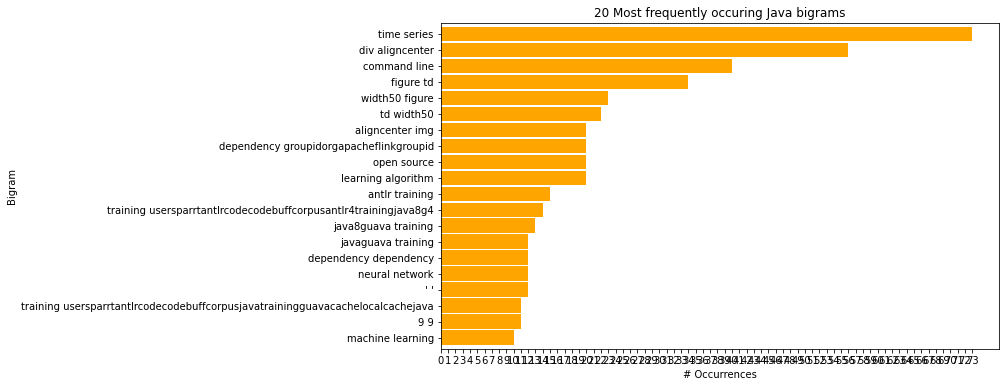

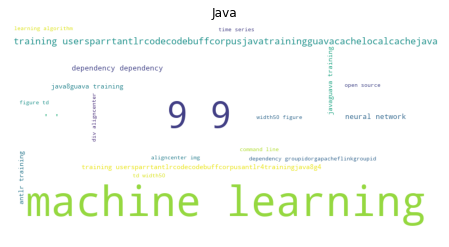

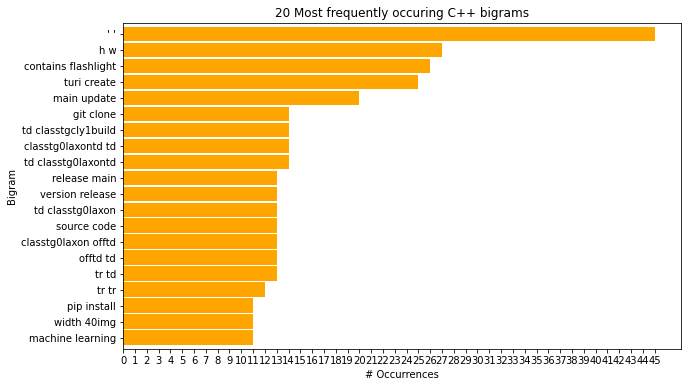

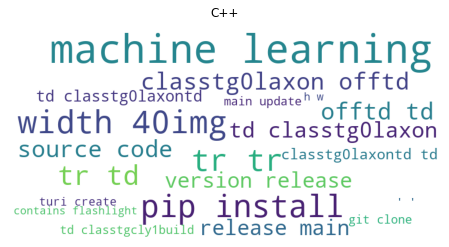

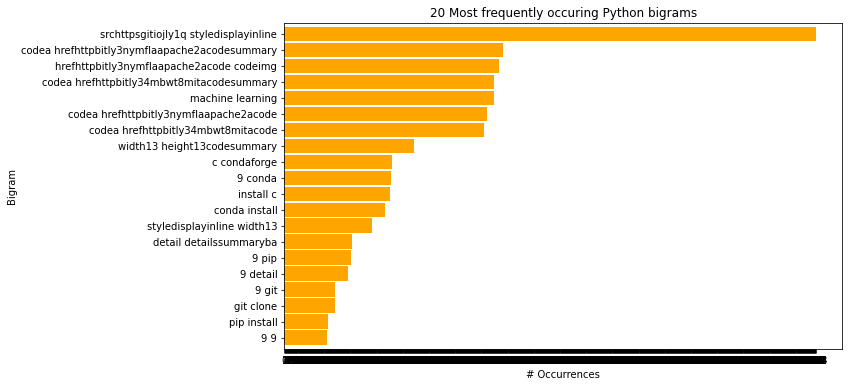

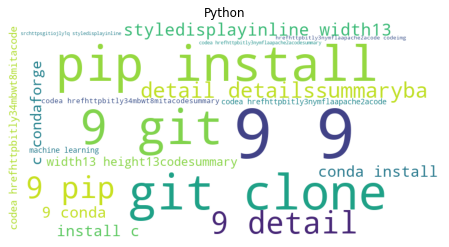

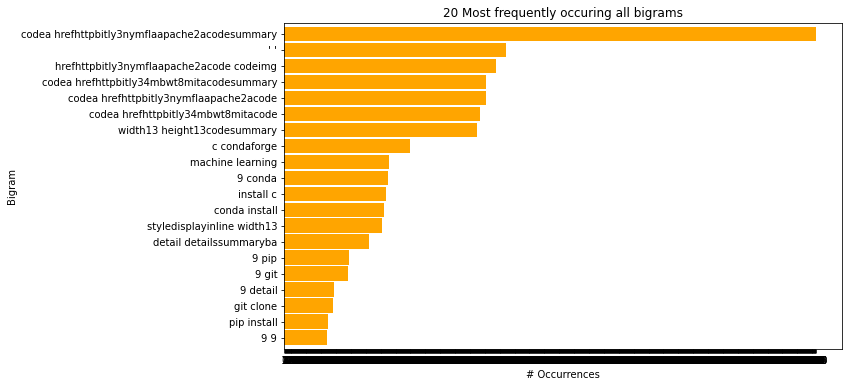

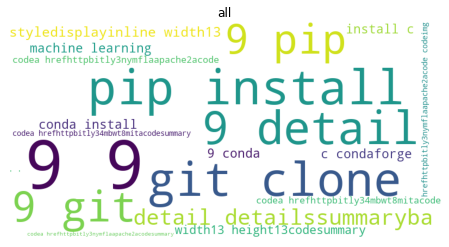

In [81]:
for col in word_counts.columns[:]:
    plot_bigrams(all_words_df, col)
    plt.show()

In [244]:
def model_words(vectorizer, class_model, ngrams_range_value, train, validate, target, print_results = True):
    """Performs classification modeling of lemmatized data. Outputs (and returns) classification reports for train and validate/test.
    
    vectorizer: the type of feature extraction method, such as Count Vectorizer or tf-idf
    class_model: the classification model to use
    ngrams_range_value: whether to use unigram, bigrams, etc. for the feature extraction
    train and test sets as well as the target variable"""
    
    feature_extraction_method = vectorizer(ngram_range=ngrams_range_value)

    X_train = feature_extraction_method.fit_transform(train.lemmatized)
    X_validate = feature_extraction_method.transform(validate.lemmatized)
    X_test = feature_extraction_method.transform(test.lemmatized)
    y_train = train[target]
    y_validate = validate[target]
    # y_test = test[target]

    train_results=pd.DataFrame(dict(actual = y_train))
    validate_results = pd.DataFrame(dict(actual = y_validate))
    # test_results = pd.DataFrame(dict(actual = y_test))

    model_to_use = class_model.fit(X_train, y_train)

    train_results['predicted'] = model_to_use.predict(X_train)
    validate_results['predicted'] = model_to_use.predict(X_validate)
    
    if type(class_model).__name__ != 'LogisticRegression':
        feature_names = feature_extraction_method.get_feature_names_out()
        feature_importances = model_to_use.feature_importances_
    else:
        feature_names = [np.nan]
        feature_importances = [np.nan]
    
    train_class_report = classification_report(train_results.actual, train_results.predicted, output_dict = True)
    validate_class_report = classification_report(validate_results.actual, validate_results.predicted,output_dict=True)
    if print_results:
        print('Accuracy: {:.2%}'.format(accuracy_score(train_results.actual, train_results.predicted)))
        print('---')
        # print('Train Confusion Matrix')
        # print(pd.crosstab(train_results_tfidf.predicted, train_results_tfidf.actual))
        print('---')
        print(pd.DataFrame(train_class_report))


        print('Accuracy: {:.2%}'.format(accuracy_score(validate_results.actual, validate_results.predicted)))
        print('---')
        # print('Validate Confusion Matrix')
        # print(pd.crosstab(validate_results_tfidf.predicted, validate_results_tfidf.actual))
        print('---')
        print(pd.DataFrame(validate_class_report))
    
    return train_class_report, validate_class_report, feature_names, feature_importances

### Baseline would be 33%, as we know there are 3 different languages in the dataset and they are evenly distributed.

In [245]:
target = 'language'
vectorizers = [CountVectorizer, TfidfVectorizer]
class_models = [RandomForestClassifier(random_state=123), LogisticRegression(), DecisionTreeClassifier(), DecisionTreeClassifier(max_depth=5)]
ngram_range_values = [(1,1),(1,2),(2,2),(1,3),(2,3)]
train_accuracies = []
validate_accuracies = []
dropoffs = []
indices=[]
model_parameters = []
feature_names_list = []
feature_importances_list = []

for v in vectorizers:
    for m in class_models:
        for ngram_range in ngram_range_values:
            # print("----")
            # print(m, v, ngram_range)
            indices.append((v.__name__, type(m).__name__, ngram_range))
            train_class_report, validate_class_report, feature_names, feature_importances = model_words(vectorizer = v,
                                                                    class_model = m, 
                                                                    ngrams_range_value=ngram_range, 
                                                                    train = train, 
                                                                    validate = validate, 
                                                                    target = target, 
                                                                    print_results=False)
            train_accuracies.append(train_class_report['accuracy'])
            validate_accuracies.append(validate_class_report['accuracy'])
            dropoffs.append(train_class_report['accuracy']-validate_class_report['accuracy'])
            model_parameters.append(m.get_params())
            feature_names_list.append(feature_names)
            feature_importances_list.append(feature_importances)

/opt/homebrew/anaconda3/envs/job_search/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/job_search/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/envs/job_search/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [246]:
results = pd.DataFrame(data = {'model_parameters': model_parameters,
                               'train_accuracy':train_accuracies,
                               'validate_accuracy':validate_accuracies,
                               'dropoff': dropoffs,
                              'feature_names':feature_names_list,
                              'feature_importances':feature_importances_list}, 
                       index=indices).sort_values('dropoff')

In [280]:
def get_top_features(row, n):
    """Outputs a list of the top n features used for the modeling"""
    if len(row.feature_names)<10:
        return np.NaN
    else:
        return pd.Series(dict(zip(row.feature_names, row.feature_importances))).sort_values().tail(n).index.tolist() 



In [281]:
results['top_features'] = results.apply(lambda row: get_top_features(row, 6), axis=1)

In [282]:
results.head()

,model_parameters,train_accuracy,validate_accuracy,dropoff,feature_names,feature_importances,top_features
"(TfidfVectorizer, LogisticRegression, (1, 1))","{'C': 1.0, 'class_weight': None, 'dual': False...",1.000000,0.861111,0.138889,[nan],[nan],NaN
"(TfidfVectorizer, LogisticRegression, (1, 3))","{'C': 1.0, 'class_weight': None, 'dual': False...",1.000000,0.833333,0.166667,[nan],[nan],NaN
"(TfidfVectorizer, LogisticRegression, (1, 2))","{'C': 1.0, 'class_weight': None, 'dual': False...",1.000000,0.833333,0.166667,[nan],[nan],NaN
"(TfidfVectorizer, DecisionTreeClassifier, (1, 1))","{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.880952,0.638889,0.242063,"[00, 000000true, 0001, 0003, 001, 0016666, 004...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[page, system, library, distributed, scientifi..."
"(CountVectorizer, DecisionTreeClassifier, (2, 2))","{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.773810,0.527778,0.246032,"[00 emptyserverformhandler, 00 fixed, 00 http,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[make sure, python api, build run, install bui..."
